<a href="https://colab.research.google.com/github/dedemasutti/Analise-de-Dados-com-Python/blob/main/Distancia_Euclidiana_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Dados resultantes dos poços mais próximos(similares) e dados do poço de teste
poços_correlatos_dados = {'Nome do Poço': ['4BVJOY', '091G7D', '2V940M', '1Y5Q6F'],
    'Fase': [1, 1, 1, 1],
    'Tipo Poço': ['VERTICAL', 'VERTICAL', 'DIRECIONAL', 'DIRECIONAL'],
    'LDA': [545.0, 494.0, 469.0, 500.0],
    'Diâmetro Fase': [26.0, 26.0, 26.0, 26.0],
    'Metragem': [543.0, 669.0, 667.0, 706.0],
    'NFases': [4, 4, 4, 4]
}

poço_entrada_dados = {
    'Nome do Poço': ['6C5G4M'],
    'Fase': [1],
    'Tipo Poço': ['VERTICAL'],
    'LDA': [598.0],
    'Diâmetro Fase': [26.0],
    'Metragem': [607.0],
    'NFases': [4]
}

# Converte os dados para DataFrame para facilitar a manipulação dos dados
df_poços_correlatos = pd.DataFrame(poços_correlatos_dados)
df_poço_teste = pd.DataFrame(poço_entrada_dados)


# Usando a codificação one hot nas variáveis categóricas com método get_dummies para usarmos a variável categorica
df_combined = pd.concat([df_poços_correlatos, df_poço_teste])
df_combined_encoded = pd.get_dummies(df_combined, columns=['Tipo Poço'])


# Separa os dados de volta para correlatos e teste
df_correlatos_encoded = df_combined_encoded.iloc[:-1]
df_teste_encoded = df_combined_encoded.iloc[-1:]

# A função calcula a distância euclidiana entre os vetores: p1 e p2;

def calcula_distancia(p1, p2):
    return np.linalg.norm(p1 - p2)

# Selecionar as características relevantes para o cálculo da distância
caracteristicas = ['Fase', 'LDA', 'Diâmetro Fase', 'Metragem', 'NFases', 'Tipo Poço_DIRECIONAL', 'Tipo Poço_VERTICAL']
poço_teste_features = df_teste_encoded[caracteristicas].values[0]
poços_correlatos_features = df_correlatos_encoded[caracteristicas].values

# Calcular as distâncias entre o poço de teste e os poços correlatos
distancias = []
for i, poço in enumerate(df_poços_correlatos['Nome do Poço']):
    dist = calcula_distancia(poço_teste_features, poços_correlatos_features[i])
    distancias.append((poço, dist))

# Ordenar as distâncias
distancias = sorted(distancias, key=lambda x: x[1])

# Imprimir os poços correlatos mais próximos ao poço de teste
print("Poços correlatos ao poço de teste 6C5G4M em ordem de similaridade:")
for poço, distancia in distancias:
    print(poço, distancia)

Poços correlatos ao poço de teste 6C5G4M em ordem de similaridade:
4BVJOY 83.09632964216891
091G7D 121.07848694132248
1Y5Q6F 139.30900904105232
2V940M 142.27789708876077


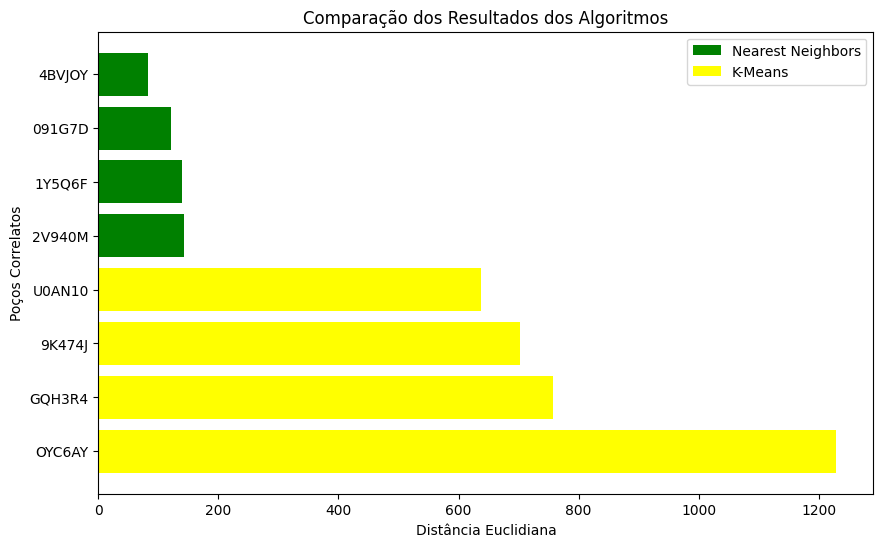

In [15]:
# Resultados do algoritmo Nearest Neighbors
poços_nn = ['4BVJOY', '091G7D', '1Y5Q6F', '2V940M']
distancias_nn = [83.09632964216891, 121.07848694132248, 139.30900904105232, 142.27789708876077]

# Resultados do algoritmo K-Means
poços_kmeans = ['U0AN10', '9K474J', 'GQH3R4', 'OYC6AY']
distancias_kmeans = [638.2146974177264, 703.0910325128604, 757.5567635497686, 1229.732897827817]

# Gráfico de barras verticais para comparar os resultados dos dois algoritmos
plt.figure(figsize=(10, 6))
plt.barh(poços_nn, distancias_nn, color='green', label='Nearest Neighbors')
plt.barh(poços_kmeans, distancias_kmeans, color='yellow', label='K-Means')
plt.xlabel('Distância Euclidiana')
plt.ylabel('Poços Correlatos')
plt.title('Comparação dos Resultados dos Algoritmos')
plt.legend()
plt.gca().invert_yaxis()  # Inverter eixo y para que o primeiro poço esteja no topo
plt.show()


In [22]:
# Resultados do algoritmo Nearest Neighbors
poços_nn = ['4BVJOY', '091G7D', '1Y5Q6F', '2V940M']
distancias_nn = [83.09632964216891, 121.07848694132248, 139.30900904105232, 142.27789708876077]

# Resultados do algoritmo K-Means
poços_kmeans = ['U0AN10', '9K474J', 'GQH3R4', 'OYC6AY']
distancias_kmeans = [638.2146974177264, 703.0910325128604, 757.5567635497686, 1229.732897827817]

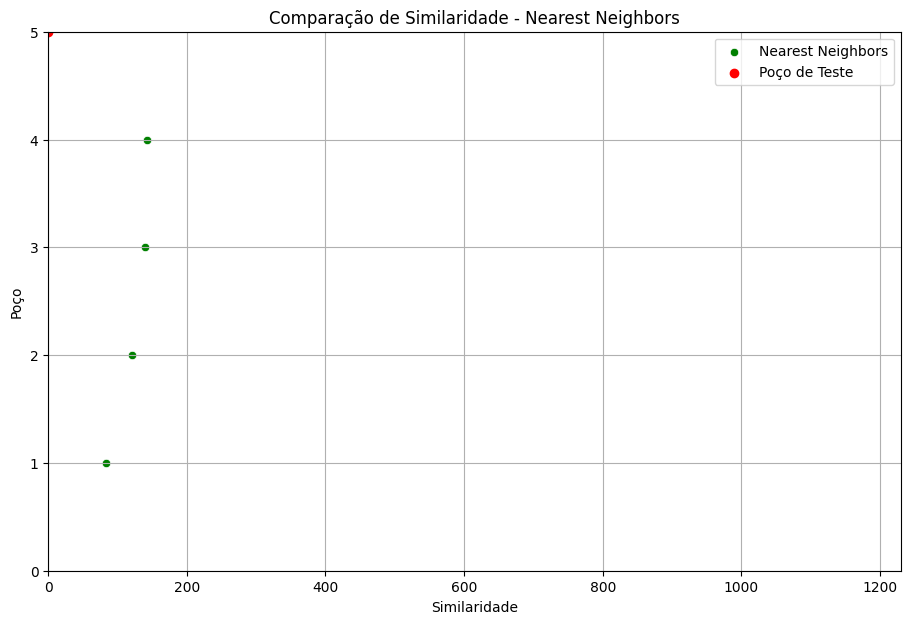

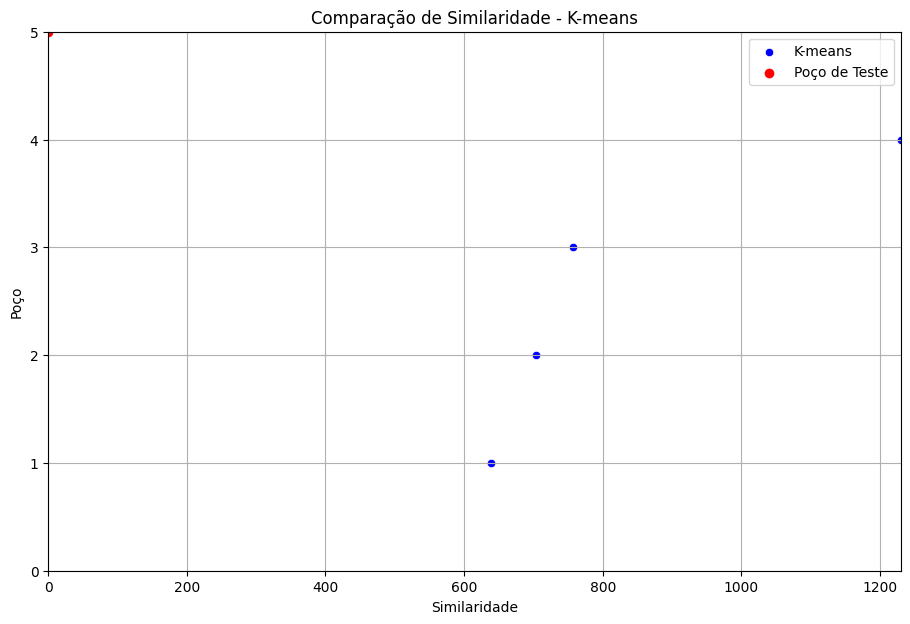

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Determinar os limites dos eixos x e y
x_lim = max(max(distancias_nn), max(distancias_kmeans))
y_lim = len(distancias_nn) + 1  # Adiciona 1 para incluir o poço de teste

# Gráfico de dispersão para Nearest Neighbors
plt.figure(figsize=(11,7))
sns.scatterplot(x=distancias_nn, y=range(1, len(distancias_nn) + 1), color='green', label='Nearest Neighbors')
plt.scatter([0], [len(distancias_nn) + 1], color='red', label='Poço de Teste')
plt.xlim(0, x_lim)
plt.ylim(0, y_lim)
plt.grid(True)
plt.xlabel('Similaridade')
plt.ylabel('Poço')
plt.title('Comparação de Similaridade - Nearest Neighbors')
plt.legend()
plt.show()

# Gráfico de dispersão para K-means
plt.figure(figsize=(11,7))
sns.scatterplot(x=distancias_kmeans, y=range(1, len(distancias_kmeans) + 1), color='blue', label='K-means')
plt.scatter([0], [len(distancias_kmeans) + 1], color='red', label='Poço de Teste')
plt.xlim(0, x_lim)
plt.ylim(0, y_lim)
plt.grid(True)
plt.xlabel('Similaridade')
plt.ylabel('Poço')
plt.title('Comparação de Similaridade - K-means')
plt.legend()
plt.show()

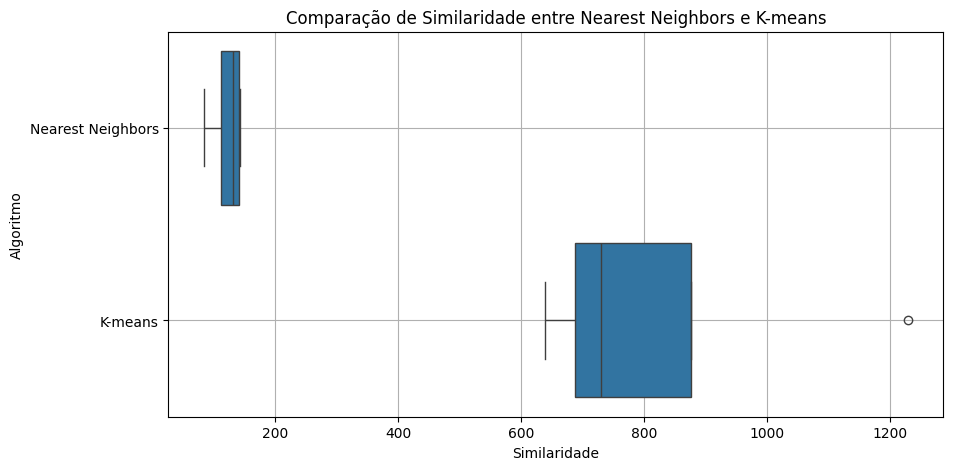

In [41]:
# Dados de exemplo
dados = {
    'Algoritmo': ['Nearest Neighbors'] * len(distancias_nn) + ['K-means'] * len(distancias_kmeans),
    'Similaridade': distancias_nn + distancias_kmeans
}

# Criar DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Plotar o boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x='Similaridade', y='Algoritmo', data=df)
plt.xlabel('Similaridade')
plt.ylabel('Algoritmo')
plt.title('Comparação de Similaridade entre Nearest Neighbors e K-means')
plt.grid(True)
plt.show()

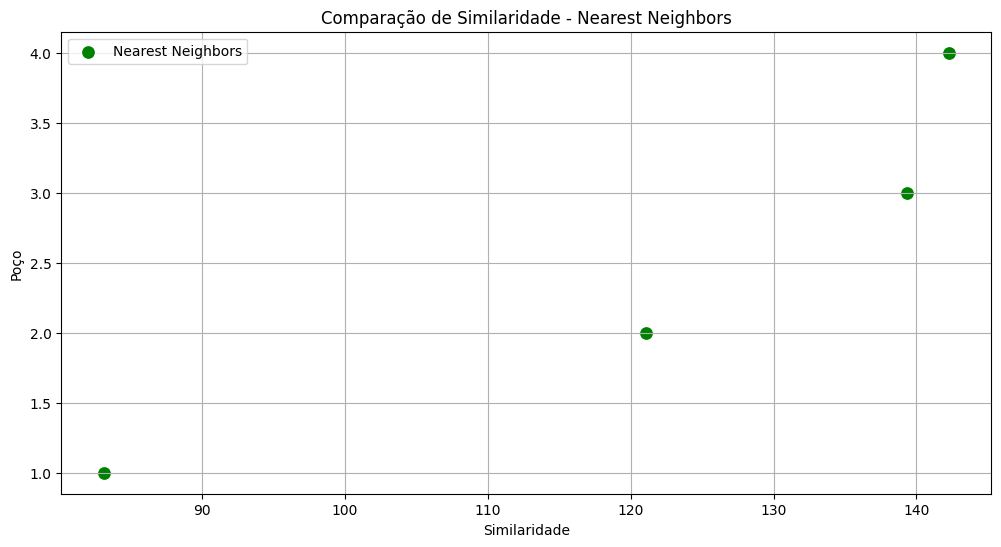

In [43]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=distancias_nn, y=range(1, len(distancias_nn) + 1), color='green', label='Nearest Neighbors', marker='o',s=100)
plt.grid(True)
plt.xlabel('Similaridade')
plt.ylabel('Poço')
plt.title('Comparação de Similaridade - Nearest Neighbors')
plt.legend()
plt.show()

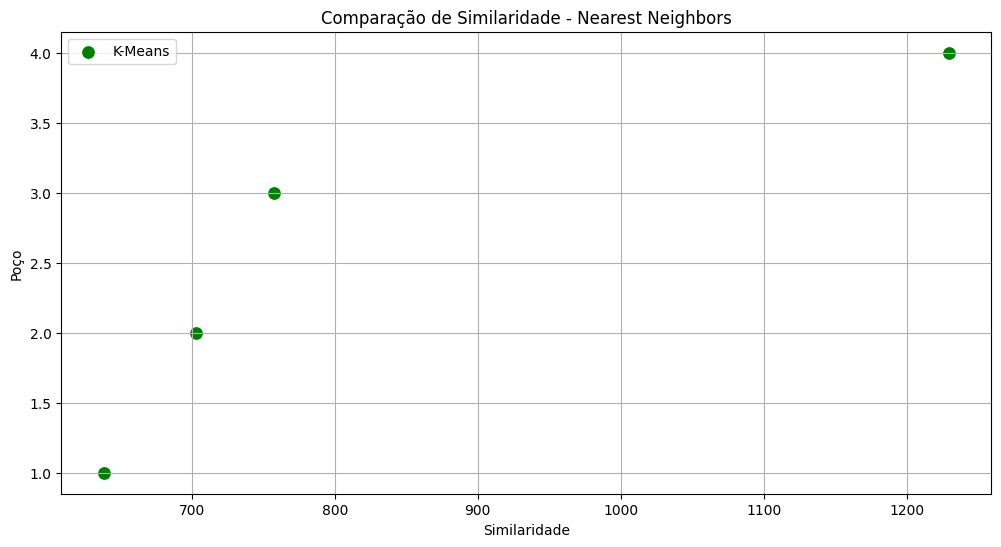

In [48]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=distancias_kmeans, y=range(1, len(distancias_kmeans) + 1), color='green', label='K-Means', marker='o',s=100)
plt.grid(True)
plt.xlabel('Similaridade')
plt.ylabel('Poço')
plt.title('Comparação de Similaridade - Nearest Neighbors')
plt.legend()
plt.show()